# Making Model Predictions
> Next we will apply models to real data and make predictions. We will explore some of the most common pit-falls and limitations of predictions, and we evaluate and compare models by quantifying and contrasting several measures of goodness-of-fit, including RMSE and R-squared. This is the Summary of lecture "Introduction to Linear Modeling in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics, Modeling]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Modeling Real Data


### Linear Model in Anthropology
If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter, who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly used today.

In this exercise, you'll use data from many living people, and the python library scikit-learn, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.



In [30]:
femur = pd.read_csv('./dataset/femur_data.csv')
legs = femur['length'].to_numpy()
heights = femur['height'].to_numpy()

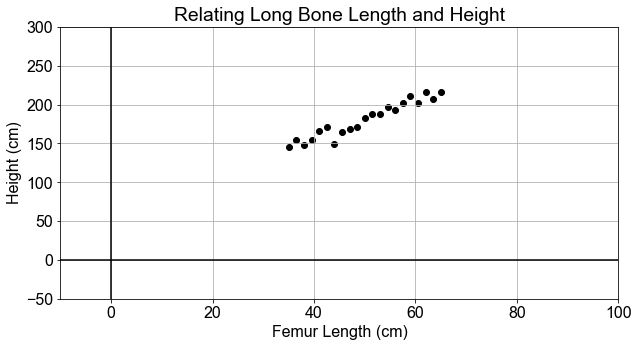

In [31]:
from matplotlib.ticker import MultipleLocator
font_options = {'family': 'Arial', 'size': 16}
plt.rc('font', **font_options)
fig, axis = plt.subplots()
axis.scatter(legs, heights, color="black", marker="o");
axis.grid(True, which="both");
axis.axhline(0, color="black");
axis.axvline(0, color="black");
axis.set_xlim(-10, 100)
axis.set_ylim(-50, 300)
axis.set_ylabel('Height (cm)');
axis.set_xlabel('Femur Length (cm)');
axis.set_title("Relating Long Bone Length and Height");

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs), 1)
heights = heights.reshape(len(heights), 1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([50.7]).reshape(-1, 1)
fossil_height = model.predict(fossil_leg)
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0, 0]))

Predicted fossil height = 181.34 cm


### Linear Model in Oceanography
Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

In [34]:
sea = pd.read_csv('./dataset/sea_level_data.csv')
years = sea['year'].to_numpy()
levels = sea['sea_level_inches'].to_numpy()
df.head()

,year,sea_level_inches
0,1970,4.677165
1,1971,4.881890
2,1972,5.240157
3,1973,5.003937
4,1974,5.472441


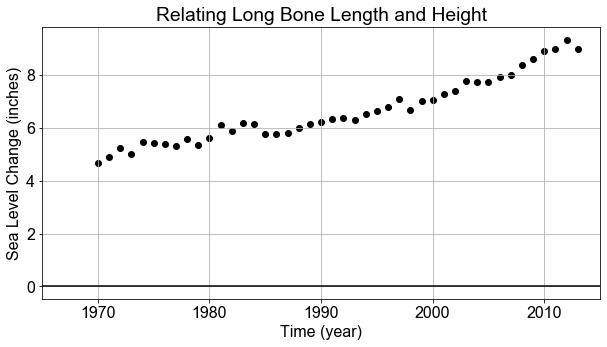

In [35]:
font_options = {'family': 'Arial', 'size': 16}
plt.rc('font', **font_options)
fig, axis = plt.subplots()
axis.scatter(years, levels, color="black", marker="o");
axis.grid(True, which="both");
axis.axhline(0, color="black");
axis.axvline(0, color="black");
axis.set_xlim(1965, 2015)
axis.set_ylabel('Sea Level Change (inches)');
axis.set_xlabel('Time (year)');
axis.set_title("Relating Long Bone Length and Height");

In [38]:
def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

Prediction: year = [[2100]], level = 16.66


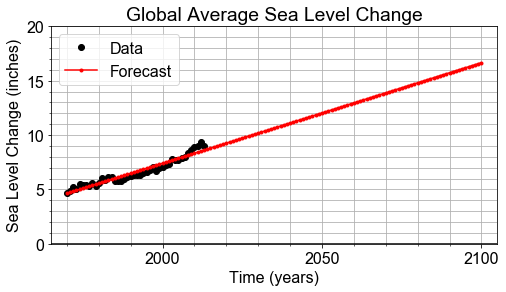

In [39]:
# Build a model, fit to the data
model = LinearRegression(fit_intercept=True)
years = years.reshape(len(years), 1)
levels = levels.reshape(len(levels), 1)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = np.array([2100]).reshape(-1, 1)
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0, 0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

### Linear Model in Cosmology
Less than 100 years ago, the universe appeared to be composed of a single static galaxy, containing perhaps a million stars. Today we have observations of hundreds of billions of galaxies, each with hundreds of billions of stars, all moving.

The beginnings of the modern physical science of cosmology came with the [publication in 1929 by Edwin Hubble](http://www.pnas.org/content/15/3/168) that included use of a linear model.

In this exercise, you will build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

In [41]:
df = pd.read_csv('./dataset/hubble_data.csv')
df.head()

,names,distances,velocities
0,SMC,0.032,170
1,LMC,0.034,290
2,NGC-221,0.275,-185
3,NGC-224,0.275,-220
4,NGC-598,0.263,-70


In [45]:
from statsmodels.formula.api import ols

# Fit the model, based on the form of the formula
model_fit = ols(formula='velocities ~ distances', data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


## The Limits of Prediction
